<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/heights_weights/heights_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sex, Height, and Weight

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.stats as stats

In [2]:
# Read the dataaset from the specified URL
df = pd.read_csv("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/heights-and-weights/sex_height_weight.csv")
df.shape

(1000, 4)

In [3]:
df.head() # Display the the head of the dataset

,Name,Sex,Height,Weight
0,Jennifer Wolfe,Male,178.476999,88.993554
1,Tina Barber,Female,161.170414,67.397069
2,Dr. David Beasley Jr.,Female,165.886131,60.477043
3,Jake Lewis,Female,171.138179,54.824506
4,John Alvarez,Male,173.360926,81.982233


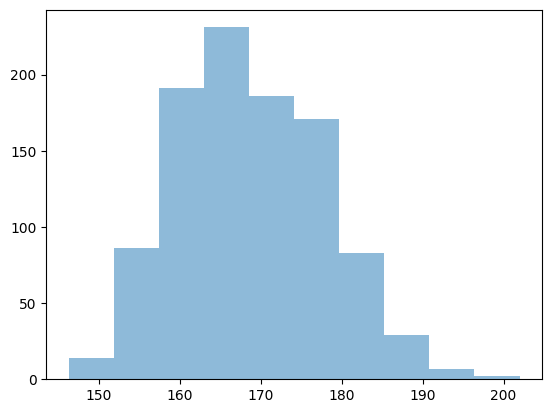

In [4]:
pyplot.hist(df['Height'], alpha=0.5) # Histogram for the population (males and females) heights
pyplot.show()

In [5]:
np.mean(df['Height']) # mean of the  population height (males and females, together)

168.6280909399918

In [6]:
df.groupby('Sex').size() # Group by Sex to find how many rows for each sex

Sex
Female    499
Male      501
dtype: int64

In [7]:
males_heights = df.loc[df['Sex'] == 'Male']['Height'] # Extract the height of the males
males_heights.head()

0     178.476999
4     173.360926
10    171.756076
12    176.693736
14    162.925575
Name: Height, dtype: float64

In [8]:
females_heights = df.loc[df['Sex'] == 'Female']['Height']  # Extract the height of the females
females_heights.head()

1    161.170414
2    165.886131
3    171.138179
5    160.595178
6    171.475277
Name: Height, dtype: float64

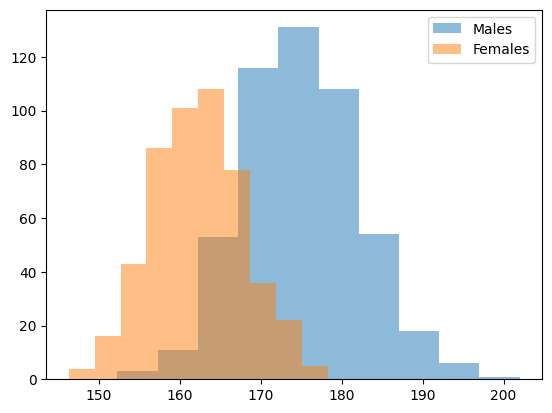

In [9]:
pyplot.hist(males_heights, alpha=0.5, label='Males') # Histogram for the males heights
pyplot.hist(females_heights, alpha=0.5, label='Females') # Histogram for the females heights
pyplot.legend(loc='upper right')
pyplot.show()

In [10]:
np.mean(males_heights) # the mean of the males heights

174.987405659491

In [11]:
np.mean(females_heights) # the mean of the females heights

162.24328798514392

## Statistical Significance in the difference between the heights according to the sex

In [12]:
stats.ttest_ind(a=males_heights, b=females_heights)

Ttest_indResult(statistic=31.339296972405272, pvalue=1.1687212633442504e-150)

The above t-test shows statistical significance p-value (1.16e-150 is much smaller than 0.05)

In [13]:
sample1 = males_heights.sample(n=10)
sample1

971    170.232638
425    184.580421
130    164.145356
574    180.805839
431    160.725375
707    187.283559
972    180.884505
961    184.304068
718    172.454715
873    169.883490
Name: Height, dtype: float64

In [14]:
np.mean(sample1)

175.52999651695512

In [15]:
sample2 = males_heights.sample(n=10)
sample2

426    168.245536
913    186.042173
217    173.342270
353    173.880430
215    180.312785
715    182.723113
17     177.199731
158    166.660876
585    176.737544
556    171.586756
Name: Height, dtype: float64

In [16]:
np.mean(sample2)

175.67312138782717

In [17]:
np.mean(sample1) - np.mean(sample2)

-0.14312487087204318

In [18]:
stats.ttest_ind(a=sample1, b=sample2)

Ttest_indResult(statistic=-0.04065056964291404, pvalue=0.968021971561037)

In [19]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = males_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

0.01444228115701654

(array([  15.,  107.,  550., 1511., 2659., 2772., 1663.,  580.,  126.,
          17.]),
 array([-11.73815292,  -9.40587602,  -7.07359912,  -4.74132222,
         -2.40904532,  -0.07676843,   2.25550847,   4.58778537,
          6.92006227,   9.25233916,  11.58461606]),
 <BarContainer object of 10 artists>)

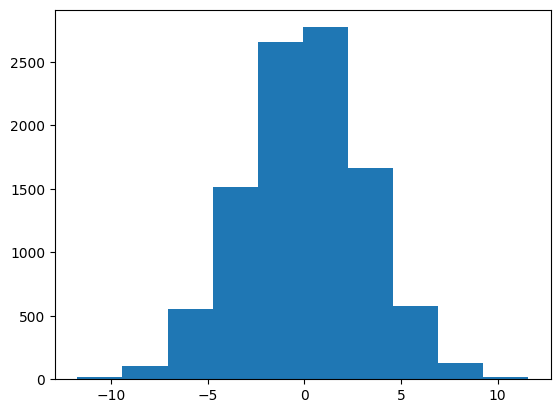

In [20]:
pyplot.hist(x=diff)

In [21]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = females_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

12.767832132143361

(array([  15.,  111.,  568., 1625., 2573., 2685., 1635.,  605.,  164.,
          19.]),
 array([ 2.61153569,  4.62899588,  6.64645607,  8.66391626, 10.68137645,
        12.69883664, 14.71629683, 16.73375702, 18.75121721, 20.7686774 ,
        22.78613759]),
 <BarContainer object of 10 artists>)

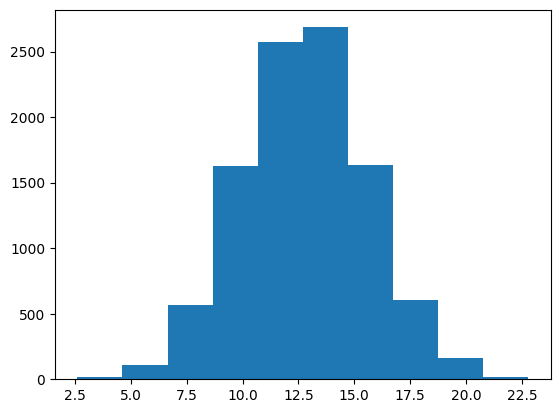

In [22]:
pyplot.hist(x=diff)